# Aula 1 - Otimização unidimensional irrestrita

## Vídeo 1.2 - Entendendo o processo de precificação

As companhias aéreas, assim como aquelas que vendem passagens de ônibus, trens, etc., necessitam definir o valor das tarifas a fim de maximizar seus lucros. É notável que o lucro seja influenciado tanto pela quantidade de vendas quanto pela própria tarifa, sendo que a quantidade de vendas, por sua vez, varia de acordo com a tarifa.

Podemos denominar de "elasticidade" o parâmetro que indica o impacto da tarifa nas vendas. Por exemplo, consideremos a seguinte expressão:

$$quantidade = 388 * (1 + elasticidade * (500 - tarifa) / 500)$$

Neste contexto, o valor 388 representa uma estimativa de vendas padrão, elaborada por uma equipe especializada em análise preditiva. A elasticidade é um parâmetro derivado de dados e variações, e também, neste momento, é um valor previamente conhecido e estimado. Já a tarifa corresponde ao valor padrão da tarifa, o que geralmente é praticado e está associado implicitamente ao valor da previsão de vendas. É importante notar que, ao ajustar a tarifa conforme a elasticidade, podemos aumentar ou reduzir a quantidade de bilhetes vendidos.

Dessa forma, podemos expressar o lucro como:

$$lucro = quantidade * tarifa$$

Abaixo, criaremos essas funções em Python.

In [ ]:
def estimar_demanda(tarifa, elasticidade):
    quantidade = 388 * (1 + elasticidade * (500 - tarifa) / 500)
    return quantidade

In [ ]:
def estimar_lucro(tarifa, elasticidade):
    quantidade = estimar_demanda(tarifa, elasticidade)
    lucro = quantidade * tarifa
    return lucro

In [ ]:
tarifa = 80  # Preço fixo
elasticidade = 0.01  # Elasticidade de preço fixa

In [ ]:
demanda = estimar_demanda(tarifa, elasticidade)
lucro = estimar_lucro(tarifa, elasticidade)

In [ ]:
demanda

391.25919999999996

In [ ]:
lucro

31300.735999999997

Podemos generalizar a expressão do lucro e obter $lucro = tarifa * \displaystyle expectativa\_vendas * \left(1 + elasticidade * \frac{(tarifa\_original - tarifa)}{tarifa\_original} \right)$

É importante destacar que esta é uma equação não linear. A não linearidade se refere ao fato de que as variáveis da equação não possuem relações proporcionais ou lineares. Mais especificamente, esse problema pode ser classificado como um problema quadrático.

## Vídeo 1.3 - Detalhando a função da expectativa de demanda

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Valores de elasticidade (varie conforme necessário)
elasticidades = [round(i, 2) for i in np.linspace(-0.5, 0.5, 21)]
# Valores de preço (fixos)
tarifa = 400  # 400 ou 600 Preço fixo para este exemplo

In [ ]:
# Calcular a quantidade de tickets vendidos para cada valor de elasticidade
quantidades_vendidas = [estimar_demanda(tarifa, elasticidade) for elasticidade in elasticidades]

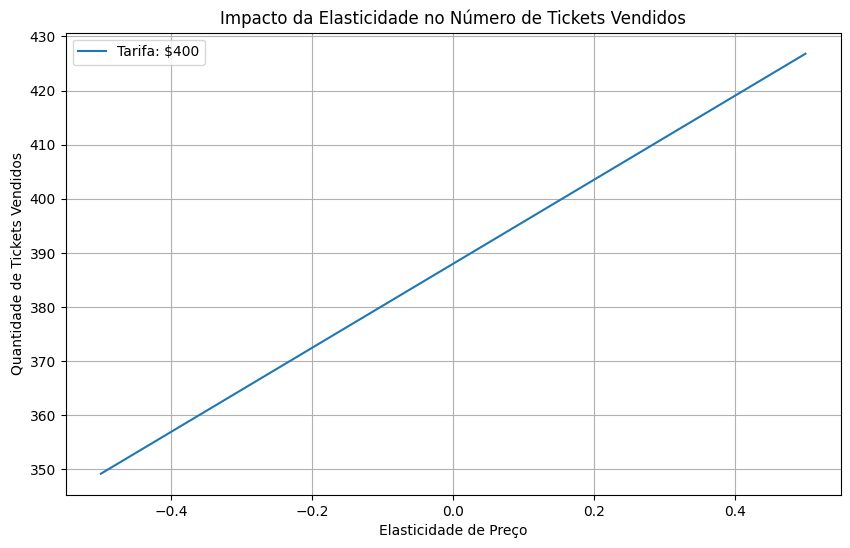

In [ ]:
#Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(elasticidades, quantidades_vendidas, label=f'Tarifa: ${tarifa}')
plt.xlabel('Elasticidade de Preço')
plt.ylabel('Quantidade de Tickets Vendidos')
plt.title('Impacto da Elasticidade no Número de Tickets Vendidos')
plt.legend()
plt.grid(True)

In [ ]:
elasticidades = elasticidades[::-1]
# Valores de tarifa (varie conforme necessário)
tarifas = np.arange(400, 600, 10)  # Varia de 90 a 110, pulando de 2 em 2

In [ ]:
# Calcular a demanda esperada para todas as combinações de tarifa e elasticidade
demandas_esperadas = np.zeros((len(elasticidades), len(tarifas)))

for i, elasticidade in enumerate(elasticidades):
    for j, tarifa_fixa in enumerate(tarifas):
        demanda_esperada = estimar_demanda(tarifa_fixa, elasticidade)
        demandas_esperadas[i, j] = demanda_esperada


In [ ]:
import seaborn as sns

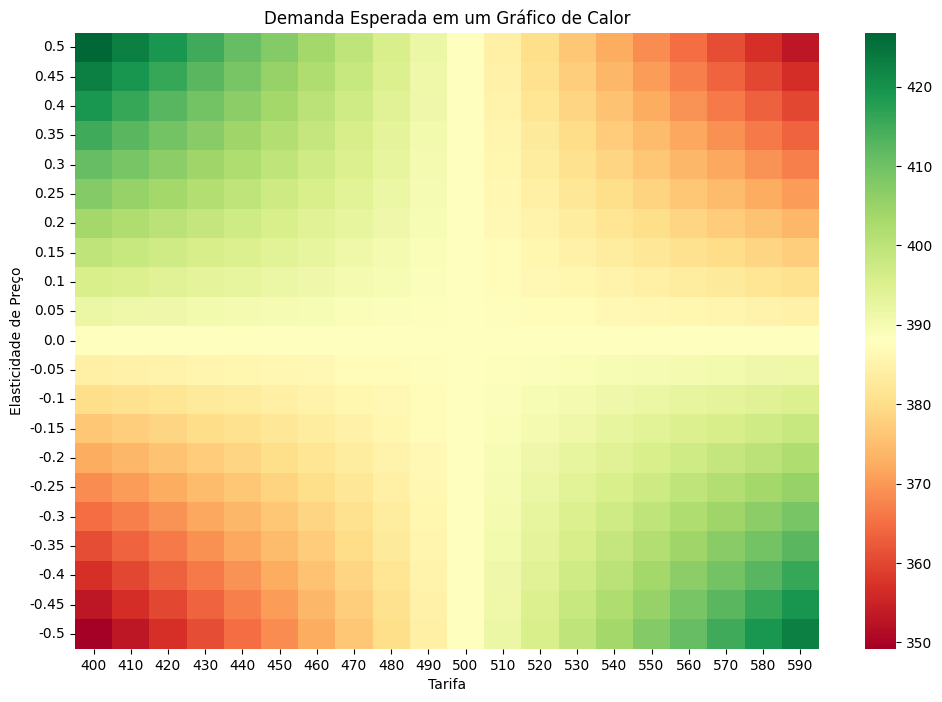

In [ ]:
# Criar o gráfico de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(demandas_esperadas, cmap='RdYlGn', xticklabels=tarifas, yticklabels=elasticidades)
plt.xlabel('Tarifa')
plt.ylabel('Elasticidade de Preço')
plt.title('Demanda Esperada em um Gráfico de Calor')
plt.show()


## Vídeo 1.4 - Otimizando a função unidimensional do lucro sem restrições

In [ ]:
# Elasticidade de preço fixa
elasticidade = 0.1
# Intervalo de preços
tarifas = np.arange(0, 5000, 10)

In [ ]:
# Calcula o lucro estimado para cada preço
lucros_estimados = [estimar_lucro(tarifa, elasticidade) for tarifa in tarifas]

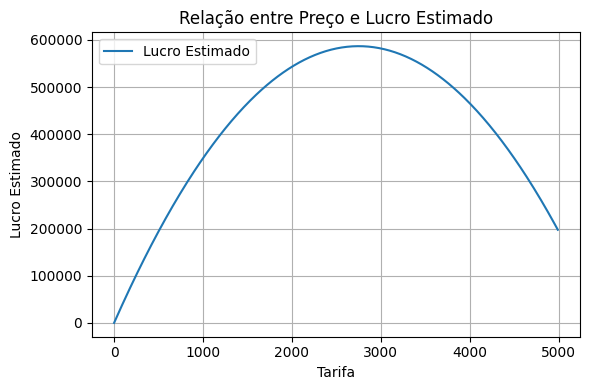

In [ ]:
# Gráfico do preço em relação ao lucro
plt.figure(figsize=(6, 4))
plt.plot(tarifas, lucros_estimados, label="Lucro Estimado")
plt.xlabel("Tarifa")
plt.ylabel("Lucro Estimado")
plt.title("Relação entre Preço e Lucro Estimado")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from scipy.optimize import minimize_scalar

In [ ]:
# Função para estimar o lucro

def funcao_objetivo(tarifa, elasticidade):
    lucro = estimar_lucro(tarifa, elasticidade)
    return -lucro  # Usamos -lucro porque estamos minimizando

In [ ]:
def encontrar_ponto_otimo(elasticidade):

    # Encontrar o preço que maximiza o lucro
    resultado = minimize_scalar(funcao_objetivo, args=(elasticidade),options={'disp':True}, method="golden")

    if resultado.success:
        preco_otimo = resultado.x
        lucro_otimo = -resultado.fun  # Retornamos o negativo, pois minimizamos o oposto do lucro
        return preco_otimo, lucro_otimo
    else:
        return None, None

In [ ]:
# Elasticidade de preço fixa (por exemplo, -0.2)
elasticidade = 0.1

In [ ]:
tarifa_otima, lucro_otimo = encontrar_ponto_otimo(elasticidade)
demanda_otima  = estimar_demanda(tarifa_otima, elasticidade)


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol = 1.4901161193847656e-08 )


In [ ]:
if tarifa_otima is not None:
    print(f"Preço Ótimo: {tarifa_otima}")
    print(f"Demanda esperada: {demanda_otima}")
    print(f"Lucro Máximo: {lucro_otimo}")
else:
    print("Não foi possível encontrar o ponto ótimo.")

Preço Ótimo: 2749.999970584623
Demanda esperada: 213.40000228263327
Lucro Máximo: 586850.0
